<a href="https://colab.research.google.com/github/LaimengEung/inf-604-data-analysis-i-repo/blob/master/Lab3_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab3: Data Quality & Preprocessing**

**Course**: **INF-604: Data Analysis** <br>
**Lecturer**: **Sothea HAS, PhD**

-----

**Objective:** In this lab, you will delve deeper into assessing the quality of datasets and employing preprocessing techniques to properly clean them.

- You can work directly with `Google Colab` here: [Lab3_Preprocessing.ipynb](https://colab.research.google.com/drive/1xdcm_U8-C2LdJ-kph_aKOb9tnaq_xIwP?usp=sharing).


-----


# 1. `Food Delivery` Dataset

Let's consider Delivery dataset discussed in the previous [Lab2](https://hassothea.github.io/Data_Analysis_AUPP/Labs/Lab2_Univariate_Analysis.html). Read and load the data from kaggle: [Food Delivery Dataset](https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction/data).

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/food-delivery-time-prediction")

print("Path to dataset files:", path)

100%|██████████| 11.6k/11.6k [00:00<00:00, 14.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/denkuznetz/food-delivery-time-prediction/versions/1


In [ ]:
# Navigate our working invironement to the correct path

%cd /root/.cache/kagglehub/datasets/denkuznetz/food-delivery-time-prediction/versions/1

%ls

/root/.cache/kagglehub/datasets/denkuznetz/food-delivery-time-prediction/versions/1
Food_Delivery_Times.csv


In [ ]:
import pandas as pd

data = pd.read_csv(path + "/Food_Delivery_Times.csv")
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


**A. Overview:**

1. Drop the column `Order_ID`. What's the dimension of this dataset?

2. Compute statistical summary to briefly understand each individual column.

3. Visualize the distribution of each column and describe the graph briefly.

4. Address the problems related to the quality of this dataset.

--------------

In [ ]:
# To do

**B. Handling Missing Data:**

You already visualized all the columns of this dataset in the previous section. We're now studying the nature of the missing values.

1. Compute the percentage of missing values within each column.

2. Create two lists:
    - `NA_list`: a list containing all the names of columns with missing values.
    - `NoNA_list`: a list containing all the names of columns without missing values.

3. Show the distribution of each column in `NoNA_list`, both before and after removing missing values based on `NA_list`.

4. Compute the statistical summary of each column in `NoNA_list`, both before and after removing missing values based on `NA_list`.

5. Deduce the nature of the missing values (e.g., **MCAR**, **MAR**, or **MNAR**)?

6. Can you explain the main reasoning that may lead to this conclusion?

7. How would you handle this missing values based on your conclusion?

In [ ]:
# data.drop(columns=['Order_ID'], inplace=True)

data.isna().sum()/data.shape[0] * 100

,0
Distance_km,0.0
Weather,3.0
Traffic_Level,3.0
Time_of_Day,3.0
Vehicle_Type,0.0
Preparation_Time_min,0.0
Courier_Experience_yrs,3.0
Delivery_Time_min,0.0


In [ ]:
NA_list = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Courier_Experience_yrs']
NoNA_list =  [x for x in data.columns if x not in NA_list]
print(NA_list)
print(NoNA_list)

['Weather', 'Traffic_Level', 'Time_of_Day', 'Courier_Experience_yrs']
['Distance_km', 'Vehicle_Type', 'Preparation_Time_min', 'Delivery_Time_min']


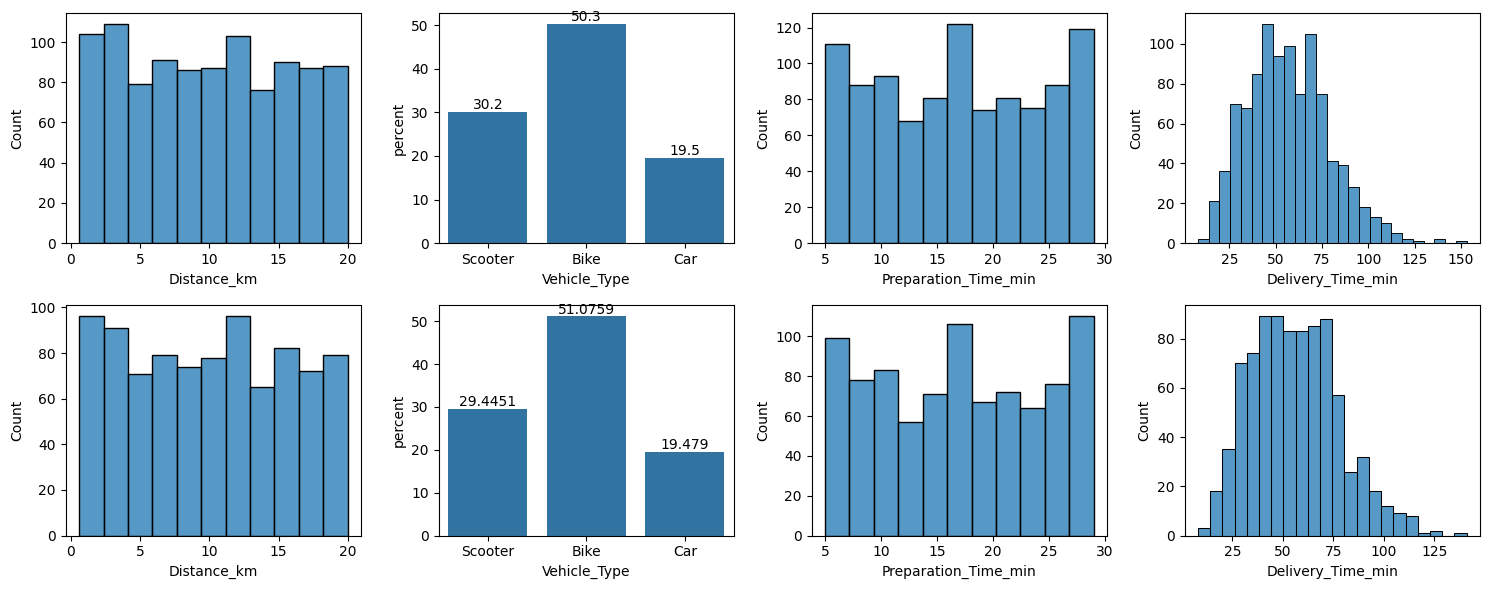

In [ ]:
# 3. Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Define the subplots
fig, axs = plt.subplots(2, 4, figsize=(15, 6))

# create graph
# sns.histplot(data, x="Distance_km", ax=axs[0,0])  # cxreate a graph
# sns.countplot(data, x='Vehicle_Type', ax=axs[0,1])
# axs[0,1].bar_label(axs[0,1].containers[0]) # ad the number on the bars


for i, va in enumerate(NoNA_list):
  if va == 'Vehicle_Type':
    sns.countplot(data, x=va, ax=axs[0,i], stat="percent")
    axs[0,i].bar_label(axs[0,i].containers[0]) # ad the number on the bars
  else:
    sns.histplot(data, x=va, ax=axs[0,i])

for i, va in enumerate(NoNA_list):
    if va == 'Vehicle_Type':
      sns.countplot(data.dropna(), x=va, ax=axs[1,i], stat="percent")
      axs[1,i].bar_label(axs[1,i].containers[0]) # ad the number on the bars
    else:
      sns.histplot(data.dropna(), x=va, ax=axs[1,i])
plt.tight_layout()
plt.show()

In [ ]:
# Statistical summary

data.describe().drop(columns=['Courier_Experience_yrs'])

,Distance_km,Preparation_Time_min,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000
mean,10.059970,16.982000,56.732000
std,5.696656,7.204553,22.070915
min,0.590000,5.000000,8.000000
25%,5.105000,11.000000,41.000000
50%,10.190000,17.000000,55.500000
75%,15.017500,23.000000,71.000000
max,19.990000,29.000000,153.000000


In [ ]:
data.dropna().describe().drop(columns=['Courier_Experience_yrs'])

,Distance_km,Preparation_Time_min,Delivery_Time_min
count,883.000000,883.000000,883.000000
mean,10.051586,17.019253,56.425821
std,5.688582,7.260201,21.568482
min,0.590000,5.000000,8.000000
25%,5.130000,11.000000,41.000000
50%,10.280000,17.000000,55.000000
75%,15.025000,23.000000,71.000000
max,19.990000,29.000000,141.000000


**C. Analyzing Connections Between Columns**

1. *Impact of Weather on Delivery Time*: determine if weather conditions affect delivery time.

2. *Influence of Traffic Level*: determine whether traffic levels impact delivery time?

3. *Effect of Vehicle Type*: How can we evaluate if the type of vehicle used influences delivery time?

4. *Role of Distance*: How can we analyze the relationship between distance and delivery time?

> ***Hint:** You can extract such a relation by visualizing two variables at the same time. For example, the impact of `Weather` on `Delivery Time` can be visualized using graph that describe `Delivery Time` within each `Weather` condition. Conditional Boxplot is a good option for such task (shown below).*

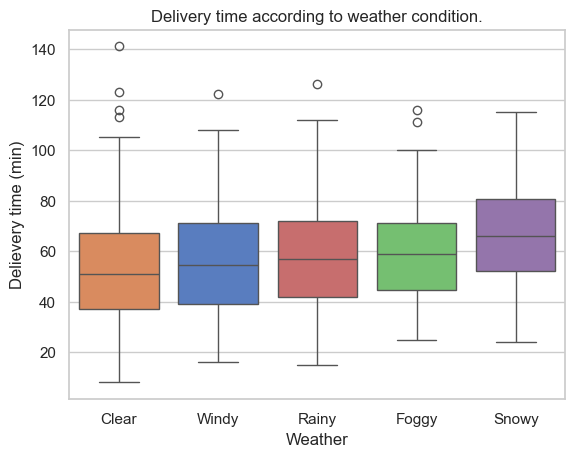

In [ ]:
# To do

# **Further Reading**

- `Pandas` python library: [https://pandas.pydata.org/docs/getting_started/index.html#getting-started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

- `Pandas Cheatsheet`: [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

- `10 Minute to Pandas`: [https://pandas.pydata.org/docs/user_guide/10min.html](https://pandas.pydata.org/docs/user_guide/10min.html)

- `Some Pandas Lession`: [https://www.kaggle.com/learn/pandas](https://pandas.pydata.org/docs/user_guide/10min.html)